<a href="https://colab.research.google.com/github/absolution747/NeuralNetwork-from-scratch/blob/master/NeuralNetwork(AM_623).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*  **Name**: Karan Shetty
*  **Roll No**.: 19-14-05
*  **Course**: Advanced Modeling Technique/ Machine Learning

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Car_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",sep =",",  # importing The Datat Set
                       names =['buying','maint','doors','persons','lug_boot','safety','Evaluation'])

mapping1 = {'vhigh': 3, 'high': 2, 'med': 1, 'low':0}                           # buying: 3 instead of vhigh, 2 instead of high, 1 instead of med, 0 instead of low.
mapping2 = { '2': 0, '3': 1, '4': 2, '5more': 3}                                 # doors: 0 instead of 2, 1, instead of 3, 2 instead of 4, 3 instead of 5more.
mapping3 = { '2': 0, '4': 1, 'more': 2}                                          # persons: 0 instead of 2, 1 instead of 4, 2 instead of more.
mapping4 = { 'small': 0, 'med': 1, 'big': 2}                                     # lug_boot: 0 instead of small, 1 instead of med, 2 instead of big.
mapping5 = { 'low': 0, 'med': 1, 'high': 2}                                      # safety: 0 instead of low, 1 instead of med, 2 instead of high.
mapping6 = { 'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}


Car_data1 = Car_data.replace({'buying': mapping1,  'maint': mapping1, 
                              'doors': mapping2, 'persons': mapping3, 
                              'lug_boot': mapping4, 'safety': mapping5, 
                              'Evaluation':mapping6})

Car_data1 = Car_data1.iloc[np.random.permutation(len(Car_data1))]               # Shuffling the Data set
  
Data_in1 = Car_data1.iloc[:,:6]                                                 # Seperating the input parameter from the target output parameter
Target1 = Car_data1.iloc[:,6]

print(Car_data)
print(Car_data1)

     buying  maint  doors persons lug_boot safety Evaluation
0     vhigh  vhigh      2       2    small    low      unacc
1     vhigh  vhigh      2       2    small    med      unacc
2     vhigh  vhigh      2       2    small   high      unacc
3     vhigh  vhigh      2       2      med    low      unacc
4     vhigh  vhigh      2       2      med    med      unacc
...     ...    ...    ...     ...      ...    ...        ...
1723    low    low  5more    more      med    med       good
1724    low    low  5more    more      med   high      vgood
1725    low    low  5more    more      big    low      unacc
1726    low    low  5more    more      big    med       good
1727    low    low  5more    more      big   high      vgood

[1728 rows x 7 columns]
      buying  maint  doors  persons  lug_boot  safety  Evaluation
346        3      0      0        2         1       1           0
40         3      3      1        1         1       1           0
1317       0      3      0        2         1

In [0]:
print(Data_in1,'\n')

print(Target1)

      buying  maint  doors  persons  lug_boot  safety
346        3      0      0        2         1       1
40         3      3      1        1         1       1
1317       0      3      0        2         1       0
503        2      3      2        1         2       2
1687       0      0      2        1         1       1
...      ...    ...    ...      ...       ...     ...
996        1      2      0        2         2       0
637        2      2      3        1         2       1
829        2      0      2        2         0       1
541        2      2      0        0         0       1
238        3      1      0        2         1       1

[1728 rows x 6 columns] 

346     0
40      0
1317    0
503     0
1687    2
       ..
996     0
637     1
829     0
541     0
238     0
Name: Evaluation, Length: 1728, dtype: int64


In [0]:
Data_in2 = Data_in1.to_numpy()      
Target2 =  Target1.to_numpy()   

print(Target2)
print(Data_in2)
                                                     
a = int(len(Data_in1)*0.8)                                                       # Splitting the data set to Trainind Data and Test Data at a ratio od 80:20

Train_data = Data_in2[:a]
Train_op = Target2[:a]

Test_data =  Data_in2[a:]
Test_op =  Target2[a:]

[0 0 0 ... 0 0 0]
[[3 0 0 2 1 1]
 [3 3 1 1 1 1]
 [0 3 0 2 1 0]
 ...
 [2 0 2 2 0 1]
 [2 2 0 0 0 1]
 [3 1 0 2 1 1]]


In [0]:
# input data
# create NeuralNetwork class
class NeuralNetwork:

    lr = 0.01

    # intialize variables in class
    def __init__(self, inputs, hidden_layer, outputs):
        self.inputs  = inputs + 1
        self.outputs = outputs
        self.hidden_layer = hidden_layer 
        self.Wij = np.random.randn(self.hidden_layer,self.inputs)
        self.Wjk = np.random.randn(self.outputs,self.hidden_layer + 1)
        self.error = []
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x)\
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self,Data):
        Data = Data.reshape((len(Data),1))
        self.hidden = np.concatenate((self.sigmoid(self.Wij@Data),np.array([[1]])))
        self.Y = 3*self.sigmoid(self.Wjk@self.hidden)

    # going backwards through the network to update weights
    def backpropagation(self,y,x):
        x = x.reshape((len(x),1))
        self.error.append(y - self.Y)
        delta_k = (y - self.Y)*3* self.sigmoid(self.Y/3, deriv=True)
        delta_j = (self.Wjk.T@delta_k)*(self.sigmoid(self.hidden, deriv=True))
        self.Wjk += NeuralNetwork.lr*(delta_k@self.hidden.T)
        self.Wij += NeuralNetwork.lr*(delta_j[:self.hidden_layer]@x.T)

    # train the neural net for epochs iterations
    def train(self,data_in,Tar_op, epochs=250):
        data_in = np.concatenate((data_in, np.ones((len(data_in),1))), axis = 1)
        for epoch in range(epochs):
            for i in range(len(data_in)):
                # flow forward and produce an output
                self.feed_forward(data_in[i])
                # go back though the network to make corrections based on the output
                self.backpropagation(Tar_op[i],data_in[i])
                # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))

            self.epoch_list.append(epoch)

    
    def Thresholding(self):
        if self.Y <= 0.5:
          self.Y = 0
        elif self.Y <= 1.5:
          self.Y = 1
        elif self.Y <= 2.5:
          self.Y = 2
        else:
         self.Y = 3
        

    def test(self,test_data,Targ_op):
        
        total_data = len(test_data)
        test_data = np.concatenate((test_data, np.ones((total_data,1))), axis = 1)
        correct_data = 0
        
        for i in range(total_data):
            self.feed_forward(test_data[i])
            self.Thresholding()
            if self.Y == Targ_op[i]:
              correct_data += 1

        Accuracy = correct_data/total_data

        return Accuracy

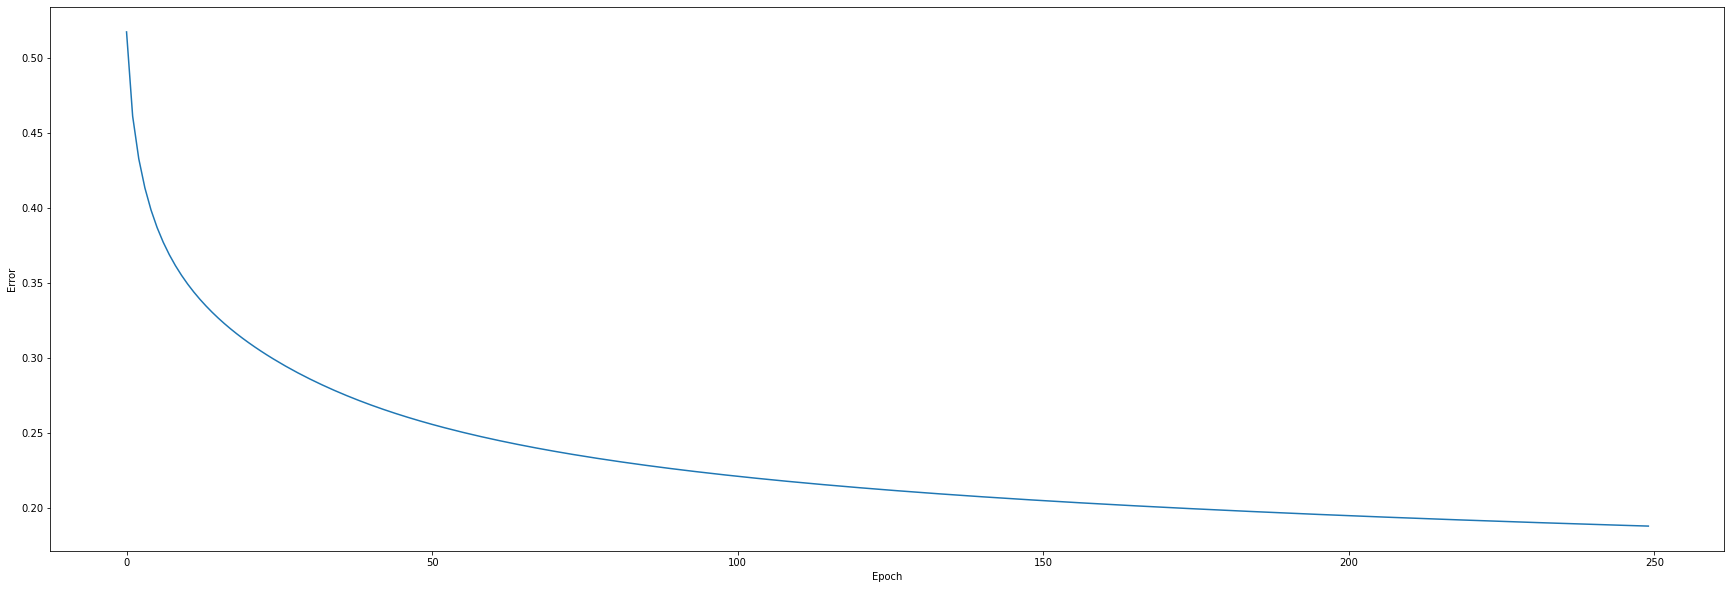

0.1880303482079956 [[0.04047169]]
Accuracy ---> 0.8815028901734104


In [0]:
NN = NeuralNetwork(6,12,1)
NN.train(Train_data,Train_op)

plt.figure(figsize=(30,10))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()
print(NN.error_history[-1],NN.Y)

Accu = NN.test(Test_data,Test_op)
print('Accuracy --->',Accu)